http://matplotlib.org/users/pyplot_tutorial.html

In [50]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [51]:
df = pd.DataFrame(np.random.randn(50, 3), columns=['Z', 'B', 'C'])
df.head(10)

,Z,B,C
0,-0.445518,1.744061,0.972108
1,-0.550190,-1.256732,1.229533
2,1.138776,1.137111,-0.647299
3,-0.778369,-0.243424,-0.181889
4,-0.477604,1.419767,-0.577718
5,0.320739,0.375678,-0.795996
6,-0.657019,-0.854852,1.345769
7,-0.435928,0.773065,-2.684164
8,0.113528,-0.496586,0.804291
9,1.614416,-0.074423,-0.527739


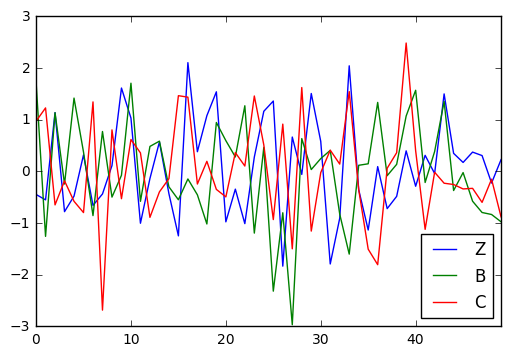

In [52]:
df.plot()

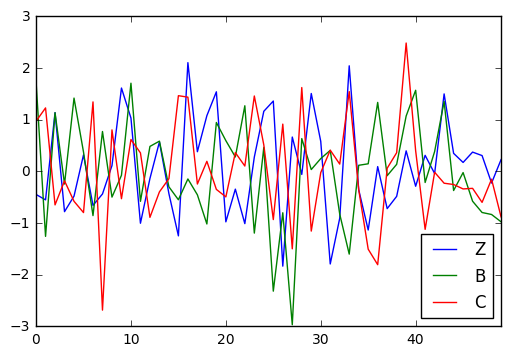

In [53]:
plot = df.plot()
fig = plot.get_figure()
fig.savefig("output.png")

Метод объединения `concat`

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html

In [54]:
names_by_year = {}
for year in range(1900, 2000, 10):
    names_by_year[year] = pd.read_csv(
        '/Users/ashvets/Temp/names/yob{}.txt'.format(year),
        names=['Name','Gender','Count']
    )
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])

In [55]:
names_all.head(10)

Name Gender  Count
Year Pos                         
1900 0         Mary      F  16707
     1        Helen      F   6343
     2         Anna      F   6114
     3     Margaret      F   5304
     4         Ruth      F   4765
     5    Elizabeth      F   4096
     6     Florence      F   3920
     7        Ethel      F   3896
     8        Marie      F   3856
     9      Lillian      F   3414

In [56]:
names_all.tail(10)

Name Gender  Count
Year Pos                          
1990 24705       Zan      M      5
     24706    Zander      M      5
     24707  Zedekiah      M      5
     24708    Zephan      M      5
     24709    Zerick      M      5
     24710      Zeus      M      5
     24711     Ziyad      M      5
     24712     Zoilo      M      5
     24713     Zoran      M      5
     24714       Zvi      M      5

In [57]:
name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()
name_dynamics.head(10)

Count
Year Name          
1900 Aaron      103
     Abbie      112
     Abby         7
     Abe         56
     Abel        15
     Abigail     14
     Abner       21
     Abraham    100
     Abram       18
     Abron        5

In [58]:
name_dynamics.query('Name == ["John", "Mary", "William"]')

Count
Year Name          
1900 John      9875
     Mary     16782
     William   8623
1910 John     11538
     Mary     22947
     William   8881
1920 John     57195
     Mary     71170
     William  50358
1930 John     52835
     Mary     64477
     William  47547
1940 John     54974
     Mary     56499
     William  44926
1950 John     79627
     Mary     65604
     William  60848
1960 John     76366
     Mary     51646
     William  49517
1970 John     58828
     Mary     19303
     William  39116
1980 John     35522
     Mary     11527
     William  25871
1990 John     29147
     Mary      8710
     William  24948

In [59]:
name_dynamics.query('Name == ["John", "Mary", "William"]').unstack('Name')

Count                  
Name     John     Mary  William
Year                           
1900   9875.0  16782.0   8623.0
1910  11538.0  22947.0   8881.0
1920  57195.0  71170.0  50358.0
1930  52835.0  64477.0  47547.0
1940  54974.0  56499.0  44926.0
1950  79627.0  65604.0  60848.0
1960  76366.0  51646.0  49517.0
1970  58828.0  19303.0  39116.0
1980  35522.0  11527.0  25871.0
1990  29147.0   8710.0  24948.0

Метод `unstack`

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html

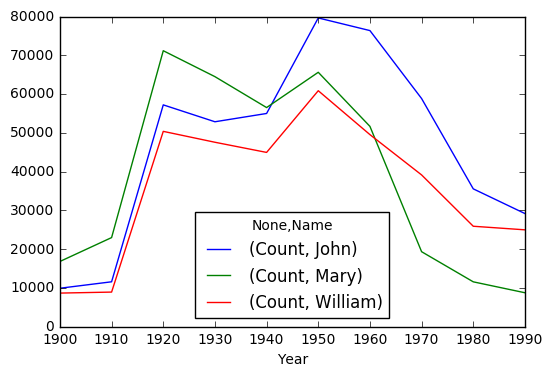

In [60]:
name_dynamics.query('Name == ["John", "Mary", "William"]').unstack('Name').plot()

Метод `plot`

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

In [61]:
gender_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Gender']).sum()
gender_dynamics.head(10)

Count
Year Gender         
1900 F        299822
     M        150490
1910 F        396503
     M        194216
1920 F       1198287
     M       1064445
1930 F       1125817
     M       1097224
1940 F       1143357
     M       1158943

In [62]:
gender_dynamics_cols = gender_dynamics.unstack('Gender')
gender_dynamics_cols

Count         
Gender        F        M
Year                    
1900     299822   150490
1910     396503   194216
1920    1198287  1064445
1930    1125817  1097224
1940    1143357  1158943
1950    1713450  1791474
1960    2022121  2132756
1970    1748250  1859647
1980    1660042  1784088
1990    1897807  2052662

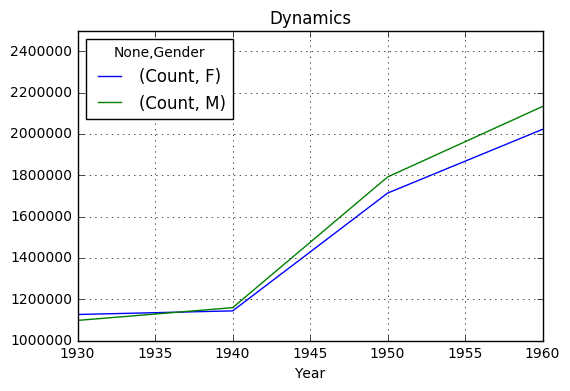

In [63]:
gender_dynamics_cols.plot(title='Dynamics', grid=True, xlim=(1930, 1960), ylim=(1000000,2500000))

Метод `bar`

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.bar.html

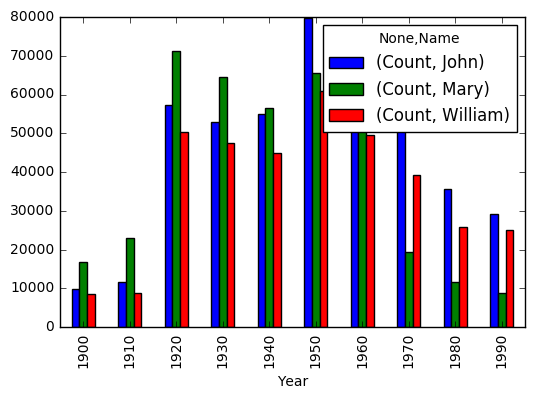

In [64]:
name_dynamics.query('Name == ["John", "Mary", "William"]').unstack('Name').plot.bar()

Метод `pie`

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.pie.html

In [65]:
names_all.groupby('Name').sum().sort_values(by='Count', ascending=False).head(5)

,Count
Name,
James,479655
John,465907
Robert,459828
Michael,392691
Mary,388665


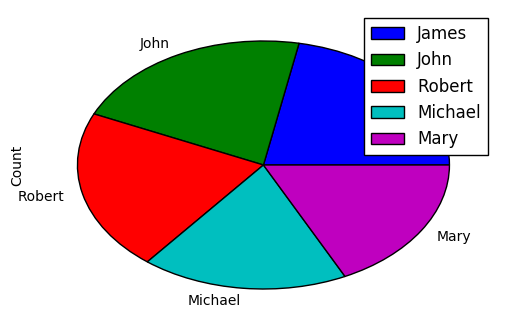

In [66]:
names_all.groupby('Name').sum().sort_values(by='Count', ascending=False).head(5).plot.pie(y='Count')

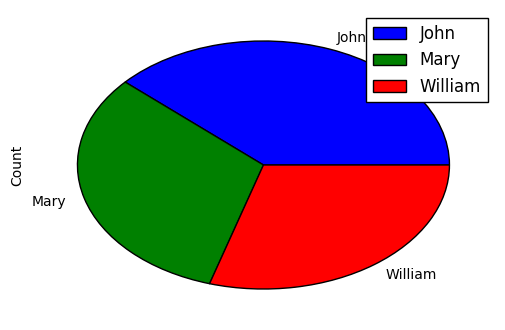

In [67]:
names_all.groupby('Name').sum().query('Name == ["John", "Mary", "William"]').plot.pie(y='Count')

In [68]:
names = pd.read_csv('/Users/ashvets/Temp/names/yob2000.txt', names=['Name','Gender','Count'])
names.head(10)

,Name,Gender,Count
0,Emily,F,25953
1,Hannah,F,23075
2,Madison,F,19967
3,Ashley,F,17997
4,Sarah,F,17689
5,Alexis,F,17627
6,Samantha,F,17264
7,Jessica,F,15705
8,Elizabeth,F,15089
9,Taylor,F,15077


In [69]:
names['Len'] = names.apply(lambda row: len(row.Name), axis=1)
names.head(10)

,Name,Gender,Count,Len
0,Emily,F,25953,5
1,Hannah,F,23075,6
2,Madison,F,19967,7
3,Ashley,F,17997,6
4,Sarah,F,17689,5
5,Alexis,F,17627,6
6,Samantha,F,17264,8
7,Jessica,F,15705,7
8,Elizabeth,F,15089,9
9,Taylor,F,15077,6


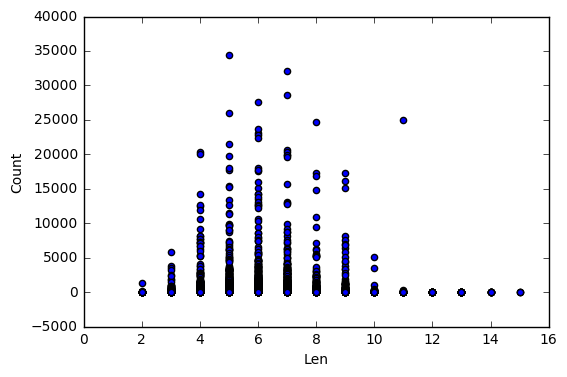

In [70]:
names.plot.scatter(x='Len', y='Count')

In [78]:
names.groupby('Gender').sum()

,Count,Len
Gender,,
F,1814738,111827
M,1962556,74160


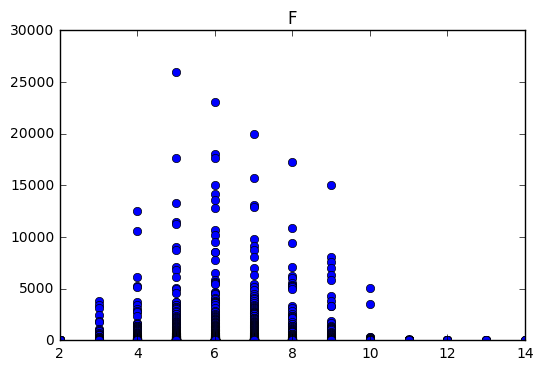

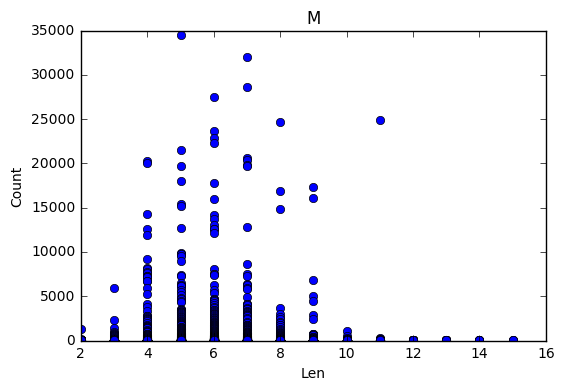

In [81]:
def scatter_len(group):
    fig = plt.figure()
    plt.plot(group['Len'], group['Count'], 'o', label=group.name)
    plt.title(group['Gender'].iloc[0])
    
    
names.groupby('Gender').apply(scatter_len)
plt.xlabel('Len')
plt.ylabel('Count')

In [ ]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.charts import Bar

In [ ]:
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]

output_notebook()

p = figure(title="simple line example", x_axis_label='x', y_axis_label='y')

p.line(x, y, legend="Temp.", line_width=2)

show(p)

In [ ]:
name_common_dynamics = names_all.groupby(level=0).sum()
name_common_dynamics.reset_index(level=0, inplace=True)
name_common_dynamics

In [ ]:
p = Bar(name_common_dynamics, 'Year', values='Count')

show(p)

In [ ]:
from bokeh.sampledata import autompg
autompg.head(10)


In [ ]:
p = Bar(autompg, 'cyl', values='mpg', title="Total MPG by CYL")

show(p)

### Домашнее задание

Результат по выполнению заданий 4.1-4.3 необходимо предоставить в виде ссылки на файл формата Jupyter (ipynb) в github.

В файле должны быть сохранены результаты запуска на тестовых данных.

Дано: данные о популярности имен для новорожденных, скачивается по ссылке https://www.ssa.gov/oact/babynames/names.zip
Добавлять исходные данные в репозиторий с выполненным заданием необязательно, но в блокноте необходимо выделить путь к файлам в отдельную переменную, которую легко поменять.

Результат по выполнению заданий необходимо предоставить в виде ссылки на файл формата Jupyter (ipynb) в github.

1. Построить график изменения количества имен Ruth и Robert с 1900 по 2000.
2. Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).
3. Построить круговую диаграмму по количеству ТОП-10 популярных имен, начинающихся на R за 1950 год.
4. Построить точечную диаграмму по количеству согласных букв в имени и частоте употребления за 100 лет.


### Полезные ссылки

* http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html
* http://matplotlib.org/users/pyplot_tutorial.html
* https://github.com/d3/d3/wiki/Gallery
* http://datavizcatalogue.com/
* https://plot.ly/
